'The most difficult thing in life is to know yourself'

stage:
1. **Understand the problem**
2. **Univaribale study**
3. **Mutivariate study**
4. **Basic cleaning**
5. **Test assumptions**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('C:/Users/pjiang/Desktop/data/house-prices-advanced-regression-techniques/train.csv')

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# what can we expect?

In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem.

In order to have some discipline in our analysis, we can create an Excel spreadsheet with the following columns:

* variable - variable name
* Type - identificatio nof the variables type. There are two possible values for this field: numerical or categorical. By numerical we mean variable for which the values are numbers, and by categorical we mean variable for which the values are categorical
* Segment - identification of the variables segment. we can define three possible segments: building, space or location. when we say building, we mean a vriable that related to the physical characteristic of the building(e.g overallqual). when we say space, we mean a variable that repors space properties of the house (e.g TotalBsmSF). Finally, when we say a location, we mean a variable that gives information about the place where the house is located(e.g 'Neighborhood')
* Expection - our expectation about the variable influence in salesprice, we can use a categorical scale with high, medium and low as possible values
* conclusion - our conclusion about the importance of the variable, after we give a quick look at the data. We can keep with the same categorical scale as in Expectation
* Comments - any general comments taht occured to us.

while Type and segment is just for possible future reference, the column 'Expectation'is important because it will help us develop a 'six sense'. To fill this column, we should read the description fo all the variable and one by one ask ourselves:
* Do we think about this variable when we are buying a house? (e.g. when we think about the house of our dream, do we care about it's Masonry veneer type)
* if so, how important would this variable be?(e.g. what is the impact of having 'Excellent' material on the exterior instead of 'poor'? and of having 'Excellent' instead of 'GOOd'?).
* Is this information already described in any other variable? (e.g. if 'LandContour' gives the flatness of the property. do we really need to know the 'LandSlope'?)

After this daunting exercise, we can filter the spreadsheet and look carefully to the varibales with 'High''Expectation'. Then, we can rush into some scatter plots between those variables san 'SalesPrice', filling in the Conclusion column which is just the correction of our expectations.

# 2. Analysing 'SalesPrice'

In [4]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

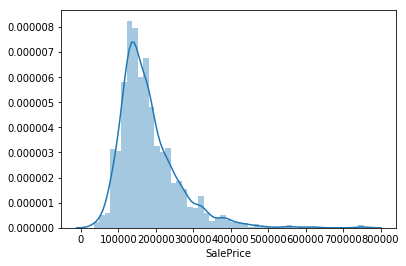

In [5]:
sns.distplot(df_train['SalePrice'])

In [6]:
# skewness and kurtosis:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())


Skewness: 1.882876
Kurtosis: 6.536282


## Relationship with numerical variables

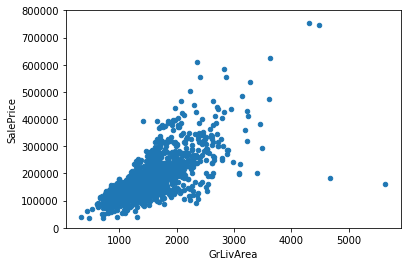

In [7]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis =1 )
data.plot.scatter(x=var, y = 'SalePrice', ylim=(0,800000))

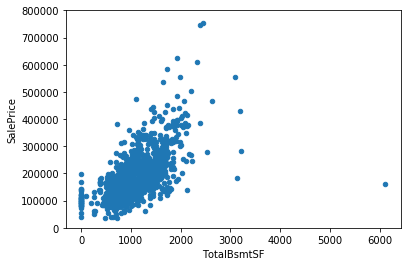

In [8]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'],df_train[var]], axis=1)
data.plot.scatter(x=var, y = 'SalePrice', ylim=(0,800000));

(-0.5, 9.5, 0, 800000)

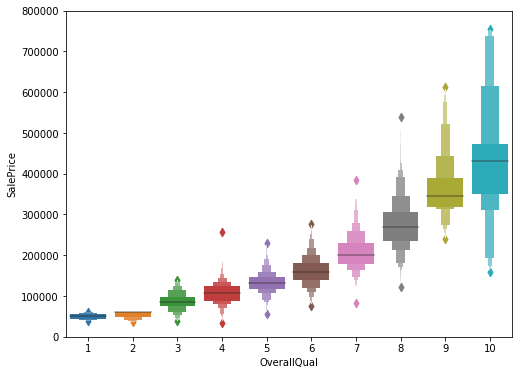

In [12]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'],df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxenplot(x=var, y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

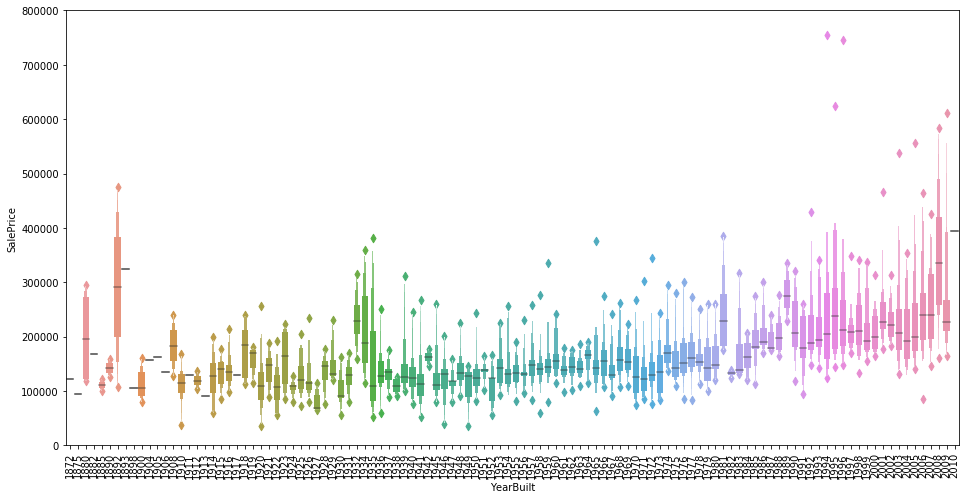

In [13]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f,ax = plt.subplots(figsize=(16,8))
fig = sns.boxenplot(x= var, y = 'SalePrice', data = data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

## Correlation matrix(heatmap style)

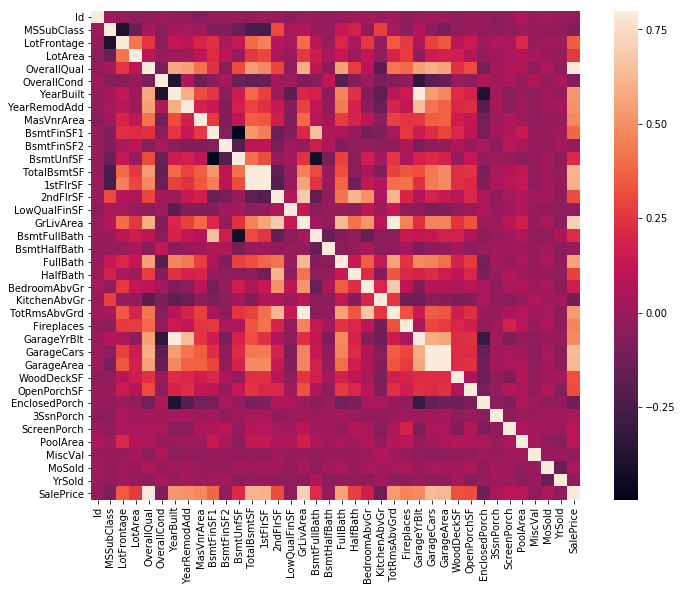

In [14]:
# correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square = True)

In [ ]:
# saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)

sns.set(font_scale=1.25)
hm = 